## Table of Content
   
1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)

 
5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary
 

COVID-19 pandemic has adverse impact to people’s daily life globally. Globally governments are trying to optimize the situation to have minimum life damage with constraints such as lack of medical and financial resources. Various measures and policies like lockdown, social distancing, wearing facemask, quarantine, etc. were deployed to control spread of the disease. These measures itself coupled with lack of awareness/asymmetry information may cause adverse mental health issues to people such as depression, anxiety etc. It’s imperative that governments and public are on same page to understand the situation and compliment the actions taken by government. Sentiment analysis provides us a gateway to understand people’s reaction on government actions/policies on specific issues like COVID-19.

This sentiment analysis was conducted on twitter tweets by Australians for period Jan 2020 to Oct 2020. Tweets surged from Jul to Sep 2020 and dropped in Oct 2020. Sun to Tue between 10 p.m. to 10 a.m was preferred by Austrlians to tweet. Most popular hashtags trended were mostly related to Australian politics and COVID-19 situation. There were three hashtags specifically tagged to Premier of Victoria, Daniel Andrews and one hashtag for Victoria Police. In general, all these hashtags surged between Jul to Aug 20 and gradually dropped till Oct 20. Political and police hashtags in general shows quarterly cycle whereas hashtags related to COVID-19 and Premier Daniel Andrews shows similar trend. Premier Daniel Andrews was tagged in 79% tweets containing tags followed by other 6 politicians.

Victorian Chief Health Officer followed by Premier Daniel Andrews, Prime Minister Scott Morrison, and Jenny Mikakos (former Australian politician) had positive public sentiment and rest of the politicians had neutral public sentiment. Overall, public sentiments were more positive for period Jan to Oct 2020, especially for period Feb to Jun 2020. For Jul 2020 to Oct 2020, positive and negative sentiments were stable. Positive tweets were more re-tweeted than negative tweets. Surprisingly, number of likes of a tweet had no relationship with the sentiment of the tweet.
Australia has witnessed surge in COVID-19 cases between Jul to Oct 2020 which peaked in Aug 2020 with maximum approximately 700 cases per day. Thus, number of cases per day has slightly negative correlation with positive tweets and positive correlation with negative tweets.

Adverse financial impact on businesses due to lockdowns has caused bit agitation among people. Australian government should accelerate vaccine drive to reduce frequency of lockdowns. Also, Australian government can perform sentiment analysis for different period and specific location to understand more comprehensive people sentiments related to COVID-19.

<a id = "cell_exploration"></a>
### 2. Data Exploration
Australians were less active on twitter for initial couple of months in 2020 and gradually tweets increased by Jun 2020. However, tweets surged from Jul to Sep 2020 and dropped in Oct 2020. People were active on twitter on Sun to Tue between 10 p.m. to 10 a.m.
Most popular hashtags trended were mostly related to Australian politics and COVID-19 situation. There were three hashtags specifically tagged to Premier of Victoria, Daniel Andrews and one hashtag for Victoria Police. In general, all these hashtags surged between Jul to Aug 20 and gradually dropped till Oct 20. Political and police hashtags in general shows quarterly cycle whereas hashtags related to COVID-19 and Premier Daniel Andrews shows similar trend.
People usually tag other users in tweets. Almost 89% of the tweets contained tagged users. Out of top 10 users tagged in tweets, 7 were politicians, 2 were journalists and 1 news channel. Premier Daniel Andrews was tagged in 79% tweets containing tags followed by other 6 politicians.


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,date
import string
#Importing nltk packages
import nltk
#nltk.download('book') 
from nltk.book import *
import calendar
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from statistics import mean
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import gensim
from gensim.parsing.preprocessing import remove_stopwords
import warnings
import spacy
import pyLDAvis
import pyLDAvis.gensim
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


C:\Users\vijay\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
import warnings
warnings.filterwarnings('ignore')


C:\Users\vijay\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
#Importing data
covid_cases = pd.read_csv("Covid19_Cases_VIC.csv")
tweets = pd.read_csv("Twitter_Data_VIC.csv",encoding='latin1',low_memory=False)
print("Shape of:\nCovid cases:{}\nTweets:{}".format(covid_cases.shape,tweets.shape))

Shape of:
Covid cases:(265, 2)
Tweets:(129395, 11)


In [5]:
covid_cases.head()

,Date,VIC
0,25-Jan-20,1
1,26-Jan-20,0
2,27-Jan-20,0
3,28-Jan-20,0
4,29-Jan-20,2


In [6]:
tweets.head()

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL
0,O007paulchr,sydney australia,1.310000e+18,Fri Oct 02 05:00:54 +0000 2020,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,-
1,O007paulchr,sydney australia,1.310000e+18,Sun Sep 27 06:32:09 +0000 2020,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,-
2,O007paulchr,sydney australia,1.310000e+18,Wed Sep 16 08:32:13 +0000 2020,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,-
3,O007paulchr,sydney australia,1.300000e+18,Sun Sep 06 05:45:36 +0000 2020,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @DanielAndrewsMP,-
4,O007paulchr,sydney australia,1.300000e+18,Tue Sep 01 10:41:13 +0000 2020,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim ...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,-


**Pre-processing tweets data**

In [7]:
#Data type
tweets.dtypes

User_ID            object
User_Location      object
Tweet_ID          float64
Tweet_Time         object
Tweet_Text         object
HashTag            object
Retweet_Count      object
Like_Count         object
Source             object
User_Mentioned     object
Attachment_URL     object
dtype: object

In [8]:
tweets.head(1)

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL
0,O007paulchr,sydney australia,1.310000e+18,Fri Oct 02 05:00:54 +0000 2020,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,-,0,0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,-


In [9]:
#Checking retweets for alphabetic rows
retweets = tweets.iloc[np.where(tweets['Retweet_Count'].str.isalpha())]
likes = tweets.iloc[np.where(tweets['Like_Count'].str.isalpha())]
print("Contains alphabets:\nRetweets:{}\nLikess:{}".format(retweets.shape,likes.shape))

Contains alphabets:
Retweets:(799, 11)
Likess:(0, 11)


In [10]:
#Checking unique alphabets in Retweets
np.unique(retweets['Retweet_Count'], return_counts = True)

(array(['Australia'], dtype=object), array([799], dtype=int64))

In [11]:
#Replacing HashTags without hashtag with word Null
tweets['HashTag'][~tweets['HashTag'].str.contains("#")] = "Null"

In [12]:
#Replacing Retweet_Count without Retweet_Count with word 0
tweets['Retweet_Count'][tweets['Retweet_Count'].str.contains("Australia")] = "0"

In [13]:
#Cleaning special character '-' from re-tweet and like count 
tweets['Retweet_Count'].replace('-','0', inplace=True)
tweets['Like_Count'].replace('-','0', inplace=True)

In [14]:
#Converting dtype from object to numeric
tweets['Retweet_Count'] = tweets['Retweet_Count'].astype(str).astype(int)
tweets['Like_Count'] = tweets['Like_Count'].astype(str).astype(int)

In [15]:
#Changing dtype of Tweet time column to date time
tweets['Tweet_Time'] =  pd.to_datetime(tweets['Tweet_Time'])
covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])

#Adding new column dates extracting date only from timestamp
tweets['Tweet_Date'] =  pd.to_datetime(tweets['Tweet_Time']).dt.date
tweets['Tweet_Date'] = pd.to_datetime(tweets['Tweet_Date'])

In [16]:
tweets.dtypes

User_ID                        object
User_Location                  object
Tweet_ID                      float64
Tweet_Time        datetime64[ns, UTC]
Tweet_Text                     object
HashTag                        object
Retweet_Count                   int32
Like_Count                      int32
Source                         object
User_Mentioned                 object
Attachment_URL                 object
Tweet_Date             datetime64[ns]
dtype: object

In [17]:
covid_cases.dtypes

Date    datetime64[ns]
VIC              int64
dtype: object

In [18]:
#Sorting (ascending) data based on tweet time
tweets.sort_values("Tweet_Time",ascending=True,inplace=True)
tweets.head()

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL,Tweet_Date
24976,IHoustonDun,"Melbourne, Australia",1.210000e+18,2020-01-01 00:17:01+00:00,@DanielAndrewsMP A true and good leader. Thank...,Null,0,1,<a href= http://twitter.com/download/iphone r...,@DanielAndrewsMP,-,2020-01-01
34185,ILynRowan1,Corowa. NSW,1.210000e+18,2020-01-01 01:38:09+00:00,@DanielAndrewsMP is showing true leadership in...,Null,0,0,<a href= http://twitter.com/download/iphone r...,@DanielAndrewsMP @GladysB,-,2020-01-01
42918,IPaulkaz12,"Bellevue Hill, Sydney",1.210000e+18,2020-01-01 01:52:49+00:00,@AussieHelitack @MikeCarlton01 @GladysB @Danie...,Null,0,0,<a href= http://twitter.com/#!/download/ipad ...,@AussieHelitack @MikeCarlton01 @GladysB @Dani...,-,2020-01-01
60106,Mabcrothers,"Melbourne, Victoria",1.210000e+18,2020-01-01 01:55:26+00:00,@DanielAndrewsMP on grave fears for 4ppl still...,Null,0,1,<a href= http://twitter.com/download/android ...,@DanielAndrewsMP @SkyNewsAust,http://pbs.twimg.com/media/ENKQ3anU8AA3aNq.jpg,2020-01-01
48266,JSafe_Leigh,"Euroa, Victoria",1.210000e+18,2020-01-01 02:13:48+00:00,Can someone please ask @DanielAndrewsMP where ...,#fuelload #maps #vicfires,0,0,<a href= http://twitter.com/download/android ...,@DanielAndrewsMP,-,2020-01-01


In [19]:
#Defind a function to clean tweet text

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def cleantext(data):
    #data = data.str.replace("(<br/>)", "")
    #data = data.str.replace('(<a).*(>).*(</a>)', '')
    #data = data.str.replace('(&amp)', '')
    #data = data.str.replace('(&gt)', '')
    #data = data.str.replace('(&lt)', '')
    #data = data.str.replace('(\xa0)', ' ')
    data = data.str.replace('(@[^a-z0-9]+)\w+',' ')
    data = data.str.replace('[!,*)@#%(&$_?.^]','')
    data = data.str.replace('(http\S+)', '')
    #data = data.str.replace('([^0-9a-z \t])',' ')   
    return data

In [20]:
tweets['TweetsText'] = cleantext(tweets['Tweet_Text'])
tweets['OnlyText'] = tweets['TweetsText'].str.replace('(@)\w+',' ')
tweets['TweetsText'] = tweets['TweetsText'].apply(remove_punctuations)

In [21]:
tweets.head(3)

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL,Tweet_Date,TweetsText,OnlyText
24976,IHoustonDun,"Melbourne, Australia",1.210000e+18,2020-01-01 00:17:01+00:00,@DanielAndrewsMP A true and good leader. Thank...,Null,0,1,<a href= http://twitter.com/download/iphone r...,@DanielAndrewsMP,-,2020-01-01,A true and good leader Thanks Dan,A true and good leader Thanks Dan
34185,ILynRowan1,Corowa. NSW,1.210000e+18,2020-01-01 01:38:09+00:00,@DanielAndrewsMP is showing true leadership in...,Null,0,0,<a href= http://twitter.com/download/iphone r...,@DanielAndrewsMP @GladysB,-,2020-01-01,is showing true leadership in his presser Un...,is showing true leadership in his presser Un...
42918,IPaulkaz12,"Bellevue Hill, Sydney",1.210000e+18,2020-01-01 01:52:49+00:00,@AussieHelitack @MikeCarlton01 @GladysB @Danie...,Null,0,0,<a href= http://twitter.com/#!/download/ipad ...,@AussieHelitack @MikeCarlton01 @GladysB @Dani...,-,2020-01-01,Doesnt explain why we dont have thos...,Doesnt explain why we dont have thos...


**A] Number of tweets were posted by month, by days of a week, and by hours of a day**

In [22]:
#Creating a tweets copy with time index
tweets_copy = tweets.copy()
tweets_copy.index = tweets['Tweet_Time']
tweets_copy.drop("Tweet_Time",axis=1,inplace=True)

In [23]:
monthly_count = tweets['Tweet_Date'].groupby([tweets.Tweet_Date.dt.month]).agg('count')
monthly_count.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']

In [24]:
monthly_count.sort_values(ascending=False)

Sep    41442
Aug    25493
Oct    23099
Jul    18184
Jun     6377
May     5793
Mar     3629
Apr     3427
Jan     1248
Feb      703
Name: Tweet_Date, dtype: int64

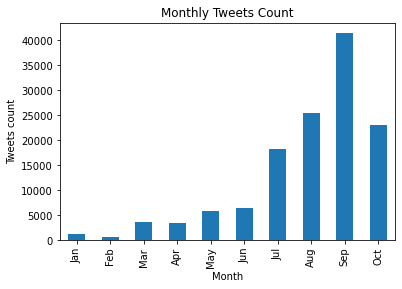

In [25]:
monthly_count.plot.bar(xlabel = "Month", ylabel = 'Tweets count', title = "Monthly Tweets Count")
plt.show()

In [26]:
weekly_count = tweets['Tweet_Date'].groupby([tweets.Tweet_Date.dt.dayofweek]).agg('count')
weekly_count.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [27]:
weekly_count.sort_values(ascending=False)

Sun    22853
Tue    20234
Mon    20049
Wed    18274
Thu    16952
Sat    16024
Fri    15009
Name: Tweet_Date, dtype: int64

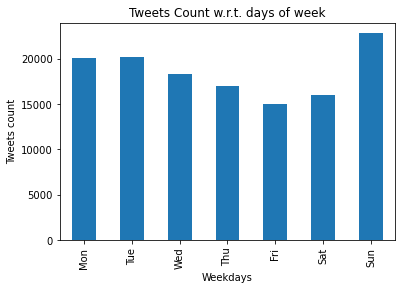

In [28]:
weekly_count.plot.bar(xlabel = "Weekdays", ylabel = 'Tweets count', title = "Tweets Count w.r.t. days of week")
plt.show()

In [29]:
hourly_count = tweets['Tweet_Time'].groupby([tweets.Tweet_Time.dt.hour]).agg('count')
hourly_count.index = ['12 a.m.','01 a.m.','02 a.m.','03 a.m.','04 a.m.','05 a.m.','06 a.m.',
                     '07 a.m.','08 a.m.','09 a.m.','10 a.m.','11 a.m.','12 p.m.','01 a.m.',
                      '02 a.m.','03 a.m.','04 a.m.','05 a.m.','06 a.m.','07 a.m.','08 a.m.',
                      '09 a.m.','10 a.m.','11 a.m.']

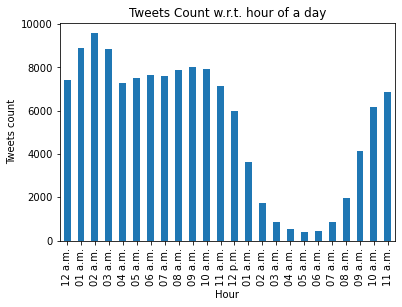

In [30]:
hourly_count.plot.bar(xlabel = "Hour", ylabel = 'Tweets count', title = "Tweets Count w.r.t. hour of a day")
plt.show()

**B] Top 10 most popular Hashtags**

In [31]:
hashtags = tweets_copy[~tweets_copy['HashTag'].str.contains("Null")]
hashtags.shape

(16548, 13)

In [32]:
#Creating a list of tags
tags = hashtags['HashTag'].str.strip()
tags = list(hashtags['HashTag'].str.split('#').explode())

#Removing blank tags
while(' ' in tags):
    tags.remove(' ')

#Removing white spaces
tags = [x.strip(' ') for x in tags]

In [33]:
tags_dist = FreqDist(tags)
tags_dist.most_common(10) 

[('auspol', 1915),
 ('IStandWithDan', 1784),
 ('COVID19Vic', 1402),
 ('springst', 1253),
 ('COVID19', 674),
 ('DictatorDan', 582),
 ('COVID19Aus', 416),
 ('COVID19Victoria', 366),
 ('vicpol', 344),
 ('ResignDanielAndrews', 316)]

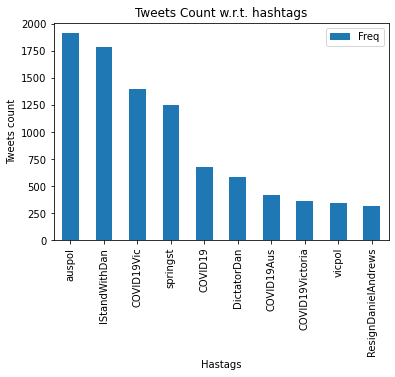

In [34]:
#Creating dataframe of tags and frequency
tags_dist_df = pd.DataFrame(tags_dist.values(),columns=['Freq'],index=tags_dist.keys())

#top10 tags
top10_tags = tags_dist_df.sort_values('Freq',ascending=False).head(10)
top10_tags.plot.bar(xlabel = "Hastags", ylabel = 'Tweets count', title = "Tweets Count w.r.t. hashtags")
plt.show()

In [35]:
top10_tags

,Freq
auspol,1915
IStandWithDan,1784
COVID19Vic,1402
springst,1253
COVID19,674
DictatorDan,582
COVID19Aus,416
COVID19Victoria,366
vicpol,344
ResignDanielAndrews,316


In [36]:
#Cleaning white spaces hastags
hashtags['HashTag'] = hashtags['HashTag'].str.strip()

#Making copy of hastags
hastags_copy = hashtags.copy()

#Changing index to date
hastags_copy.index = hastags_copy["Tweet_Date"]

#Creating timeseries of individual hashtags
tags_copy = hastags_copy['HashTag'].str.split('#').explode()

In [37]:
#Creating a function to create timeseries file for top 10 hashtags

def creatFiles(tag):
    tag_data = pd.DataFrame(tags_copy.iloc[np.where(tags_copy==tag)])
    month=[]
    for i in tag_data.index.month:
        mon = calendar.month_abbr[i]
        month.append(mon)
    tag_data['month'] = month
    monthly_tag_data = tag_data.groupby(tag_data['month'],sort=False).agg('count')#.plot()
    return monthly_tag_data

**B - All hashtags spiked during Jun-Jul till Oct 2020**

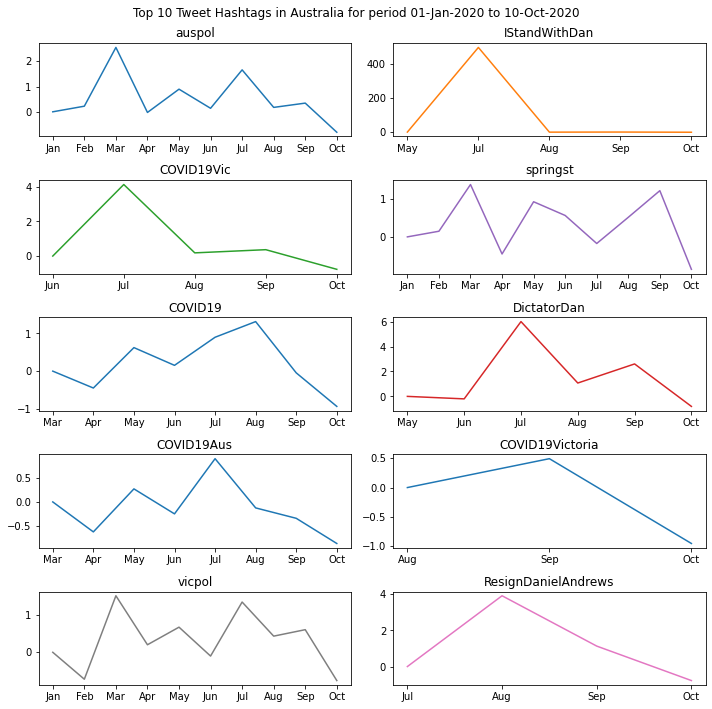

In [38]:
fig, axs = plt.subplots(5, 2,figsize=(10,10))
fig.suptitle("Top 10 Tweet Hashtags in Australia for period 01-Jan-2020 to 10-Oct-2020")   
axs[0, 0].plot(creatFiles('auspol').pct_change().fillna(0))
axs[0, 0].set_title('auspol')
axs[0, 1].plot(creatFiles('IStandWithDan').pct_change().fillna(0), 'tab:orange')
axs[0, 1].set_title('IStandWithDan')
axs[1, 0].plot(creatFiles('COVID19Vic').pct_change().fillna(0), 'tab:green')
axs[1, 0].set_title('COVID19Vic')
axs[1, 1].plot(creatFiles('springst').pct_change().fillna(0), 'tab:purple')
axs[1, 1].set_title('springst')
axs[2, 0].plot(creatFiles('COVID19').pct_change().fillna(0), 'tab:blue')
axs[2, 0].set_title('COVID19')
axs[2, 1].plot(creatFiles('DictatorDan').pct_change().fillna(0), 'tab:red')
axs[2, 1].set_title('DictatorDan')
axs[3, 0].plot(creatFiles('COVID19Aus').pct_change().fillna(0), 'tab:blue')
axs[3, 0].set_title('COVID19Aus')
axs[3, 1].plot(creatFiles('COVID19Victoria').pct_change().fillna(0), 'tab:blue')
axs[3, 1].set_title('COVID19Victoria')
axs[4, 0].plot(creatFiles('vicpol').pct_change().fillna(0), 'tab:gray')
axs[4, 0].set_title('vicpol')
axs[4, 1].plot(creatFiles('ResignDanielAndrews').pct_change().fillna(0), 'tab:pink')
axs[4, 1].set_title('ResignDanielAndrews')
plt.tight_layout()

**C] Top 10 Twitter user mentioned in public tweets**

In [39]:
users = tweets_copy[~tweets_copy['User_Mentioned'].str.contains("-")]
users.shape

(114897, 13)

In [40]:
#Creating a list of users
users_list = users['User_Mentioned'].str.strip()
users_list = list(users['User_Mentioned'].str.split('@').explode())

#Removing blank users
#while(' ' in users_list):
    #users_list.remove(' ')

#Removing white spaces
users_list = [x.strip(' ') for x in users_list]

In [41]:
users_dist = FreqDist(users_list)
users_dist.most_common(11) 

[('', 114897),
 ('DanielAndrewsMP', 110234),
 ('SkyNewsAust', 6795),
 ('ScottMorrisonMP', 5117),
 ('VictorianCHO', 4180),
 ('JennyMikakos', 2481),
 ('newbury3186', 2326),
 ('TimSmithMP', 2254),
 ('michaelobrienmp', 1934),
 ('rwillingham', 1706),
 ('rachelbaxendale', 1644)]

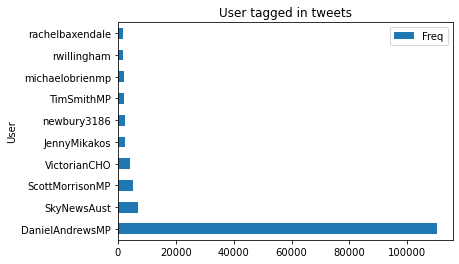

In [42]:
#Creating dataframe of tags and frequency
users_dist_df = pd.DataFrame(users_dist.values(),columns=['Freq'],index=users_dist.keys())

#top10 tags
top10_users = users_dist_df.sort_values('Freq',ascending=False).head(11)
top10_users = top10_users[1:]
top10_users.plot.barh(xlabel = "User", ylabel = 'Tweets count', title = "User tagged in tweets")
plt.show()

In [43]:
top10_users['Freq']/sum(top10_users['Freq'])

DanielAndrewsMP    0.794932
SkyNewsAust        0.049001
ScottMorrisonMP    0.036900
VictorianCHO       0.030143
JennyMikakos       0.017891
newbury3186        0.016774
TimSmithMP         0.016254
michaelobrienmp    0.013947
rwillingham        0.012303
rachelbaxendale    0.011855
Name: Freq, dtype: float64

1. DanielAndrewsMP - Daniel Michael Andrews is an Australian Labor Party politician who has been Premier of Victoria since December 2014 and Leader of the Labor Party in Victoria since 2010.

2. ScottMorrisonMP - Scott John Morrison is an Australian politician who is the 30th and current prime minister of Australia. He took office in August 2018 upon his election as leader of the Liberal Party. 

3. VictorianCHO - Chief Health Officer for Victoria

4. JennyMikakos - Jenny Mikakos is a former Australian politician for the Labor Party who was a Member of the Legislative Council of Victoria from 1999 to 2020.

5. newbury3186 - James Benjamin Kingsley Newbury is an Australian politician. He has been a Liberal Party member of the Victorian Legislative Assembly since November 2018, representing the seat of Brighton.

6. TimSmithMP - Timothy Colin Smith is an Australian politician in the Victorian Legislative Assembly, serving as the Member for Kew since 2014.

7. michaelobrienmp - Michael Anthony O'Brien is an Australian politician. He has been a Liberal Party member of the Victorian Legislative Assembly since 2006, representing the electorate of Malvern[1] and currently serves as the leader of the party and Opposition Leader since December 2018.

8. rwillingham - Richard Willingham is a journalist.

9. rachelbaxendale - Rachel Baxendale is a journalist.

10. SkyNewsAust - Sky News Australia (News channel).

In [44]:
top10_users

,Freq
DanielAndrewsMP,110234
SkyNewsAust,6795
ScottMorrisonMP,5117
VictorianCHO,4180
JennyMikakos,2481
newbury3186,2326
TimSmithMP,2254
michaelobrienmp,1934
rwillingham,1706
rachelbaxendale,1644


<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

Victorian Chief Health Officer followed by Premier Daniel Andrews, Prime Minister Scott Morrison, and Jenny Mikakos (former Australian politician) had positive public sentiment and rest of the politicians had neutral public sentiment based on the net sentiment score.
Overall, public sentiments were more positive for period Jan to Oct 2020, especially for period Feb to Jun 2020. For Jul 2020 to Oct 2020, positive and negative sentiments were stable. On an average, public had more positive sentiments than negative sentiments for period Jan to Oct 2020. Positive tweets were more re-tweeted than negative tweets. Surprisingly, number of likes of a tweet had no relationship with the sentiment of the tweet.
Australia has witnessed surge in COVID-19 cases between Jul to Oct 2020 which peaked in Aug 2020 with maximum approximately 700 cases per day. Thus, number of cases per day has slightly negative correlation with positive tweets and positive correlation with negative tweets.


**D] Public sentiments towards popular politicians tagged in tweets by public**

In [45]:
#Declaring variables
neg = []
neu = []
pos = []
comp = []

#Initializing Sentiment analyzer
sid = SentimentIntensityAnalyzer()

#Function to get sentiment score for each statement
for i in range(len(users)):
    score = sid.polarity_scores(users['OnlyText'][i])
    negative = list(score.values())[0]
    neutral = list(score.values())[1]
    positive = list(score.values())[2]
    compound = list(score.values())[3]
    
    neg.append(negative)
    neu.append(neutral)
    pos.append(positive)
    comp.append(compound)

In [46]:
#Appending data to users dataframe
users['neg'] = neg
users['pos'] = pos
users['neu'] = neu
users['comp'] = comp
users.head(1)

,User_ID,User_Location,Tweet_ID,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL,Tweet_Date,TweetsText,OnlyText,neg,pos,neu,comp
Tweet_Time,,,,,,,,,,,,,,,,,
2020-01-01 00:17:01+00:00,IHoustonDun,"Melbourne, Australia",1.210000e+18,@DanielAndrewsMP A true and good leader. Thank...,Null,0,1,<a href= http://twitter.com/download/iphone r...,@DanielAndrewsMP,-,2020-01-01,A true and good leader Thanks Dan,A true and good leader Thanks Dan,0.0,0.741,0.259,0.8225


In [47]:

#Define function to compute sentiment score for aspect
def aspect_sentiment(top10users,data,usercol,negcol,poscol):
    pos = []
    neg = []
    for i in range(len(top10users)):
        tweetid = top10users.index[i]
        #print(tweetid)
        #Extracting index based on tweetid
        Index = data[usercol].str.contains(tweetid)
    
        #Extracting pos and neg score based on index
        Pos = data[Index][poscol]
        Neg = data[Index][negcol]
        
        #Return average of sentiment scores of aspect
        pos.append(round(mean(Pos),3))
        neg.append(round(mean(Neg),3))
   
    return pos,neg

In [48]:
pos,neg = aspect_sentiment(top10_users,users,'User_Mentioned','neg','pos')

In [49]:
top10_users['pos'] = pos
top10_users['neg'] = neg
top10_users['net_score'] = top10_users['pos'] - top10_users['neg']
top10_users.sort_values('net_score',ascending = False)

,Freq,pos,neg,net_score
VictorianCHO,4180,0.120,0.081,0.039
DanielAndrewsMP,110234,0.112,0.095,0.017
ScottMorrisonMP,5117,0.107,0.090,0.017
JennyMikakos,2481,0.105,0.088,0.017
michaelobrienmp,1934,0.098,0.087,0.011
rwillingham,1706,0.090,0.079,0.011
newbury3186,2326,0.106,0.105,0.001
TimSmithMP,2254,0.104,0.103,0.001
rachelbaxendale,1644,0.090,0.098,-0.008
SkyNewsAust,6795,0.087,0.110,-0.023


**E] a) Overall public sentiments change in relation to the Covid-19 cases in Victoria**

In [50]:
#Define function to compute sentiment score for aspect
def aspect_sentiment(data,usercol,negcol,poscol):
    pos = []
    neg = []
    for i in range(len(data)):        
        #Extracting pos and neg score based on index
        Pos = data[Index][poscol]
        Neg = data[Index][negcol]
        
        #Return average of sentiment scores of aspect
        pos.append(round(mean(Pos),3))
        neg.append(round(mean(Neg),3))
   
    return pos,neg

In [51]:
#Declaring variables
neg1 = []
neu1 = []
pos1 = []
comp1 = []

#Initializing Sentiment analyzer
sid1 = SentimentIntensityAnalyzer()

#Function to get sentiment score for each statement
for i in range(len(tweets_copy)):
    score1 = sid1.polarity_scores(tweets_copy['OnlyText'][i])
    negative1 = list(score1.values())[0]
    neutral1 = list(score1.values())[1]
    positive1 = list(score1.values())[2]
    compound1 = list(score1.values())[3]
    
    neg1.append(negative1)
    neu1.append(neutral1)
    pos1.append(positive1)
    comp1.append(compound1)

In [52]:
#Appending data to tweets copy df
tweets_copy['pos'] = pos1
tweets_copy['neg'] = neg1
tweets_copy['net_score'] = tweets_copy['pos'] - tweets_copy['neg']
tweets_copy.sort_values('net_score',ascending = False).head(3)

,User_ID,User_Location,Tweet_ID,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL,Tweet_Date,TweetsText,OnlyText,pos,neg,net_score
Tweet_Time,,,,,,,,,,,,,,,,
2020-03-26 01:48:51+00:00,KAmyMMaugha,"Melbourne, Australia",1.240000e+18,@FelicityMarlowe @DanielAndrewsMP Agreed.,Null,0,0,<a href= https://mobile.twitter.com rel= nofo...,@FelicityMarlowe @DanielAndrewsMP,-,2020-03-26,Agreed,Agreed,1.0,0.0,1.0
2020-09-27 04:17:27+00:00,Llovetheyan,Highton.Geelong.AUSTRALIA,1.310000e+18,@RobRuadh @DanielAndrewsMP Agreed https://t.co...,Null,0,2,<a href= http://twitter.com/download/android ...,@RobRuadh @DanielAndrewsMP,http://pbs.twimg.com/media/Ei5OpzEUcAANyqp.jpg,2020-09-27,Agreed,Agreed,1.0,0.0,1.0
2020-05-04 20:10:14+00:00,JEmma_Brown,Melbourne,1.260000e+18,@CathLAndrews @DanielAndrewsMP Cute!,Null,0,1,<a href= http://twitter.com/download/iphone r...,@CathLAndrews @DanielAndrewsMP,-,2020-05-04,Cute,Cute,1.0,0.0,1.0


In [53]:
#Creating average monthly score
monthly_avg_score = tweets_copy.resample('M', on='Tweet_Date').mean()
monthly_avg_score.drop('Tweet_ID',axis=1,inplace=True)

In [54]:
monthly_avg_score

,Retweet_Count,Like_Count,pos,neg,net_score
Tweet_Date,,,,,
2020-01-31,228.169872,2.689103,0.129016,0.092919,0.036097
2020-02-29,29.206259,2.028450,0.109004,0.102743,0.006262
2020-03-31,112.066134,3.526316,0.111680,0.074591,0.037089
2020-04-30,224.399767,2.689816,0.125655,0.088404,0.037251
2020-05-31,61.362679,3.977041,0.114273,0.082480,0.031794
2020-06-30,75.709895,3.143171,0.102655,0.098240,0.004415
2020-07-31,229.748130,3.550099,0.109842,0.096542,0.013300
2020-08-31,133.533205,4.816067,0.111164,0.100155,0.011008
2020-09-30,75.843709,4.404179,0.110780,0.095245,0.015535


<AxesSubplot:xlabel='Tweet_Date'>

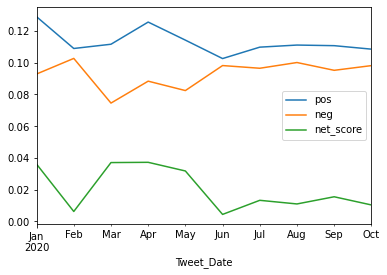

In [55]:
monthly_avg_score[['pos','neg','net_score']].plot()

<AxesSubplot:xlabel='Tweet_Date'>

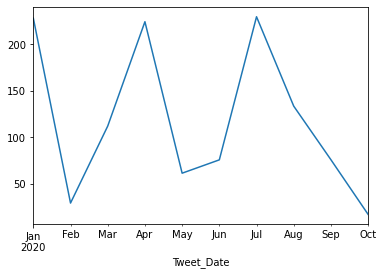

In [56]:
monthly_avg_score['Retweet_Count'].plot()

<AxesSubplot:xlabel='Tweet_Date'>

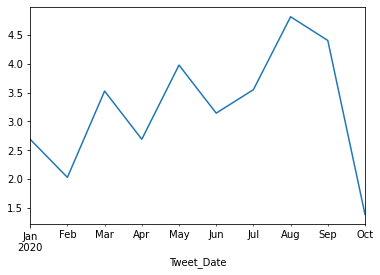

In [57]:
monthly_avg_score['Like_Count'].plot()

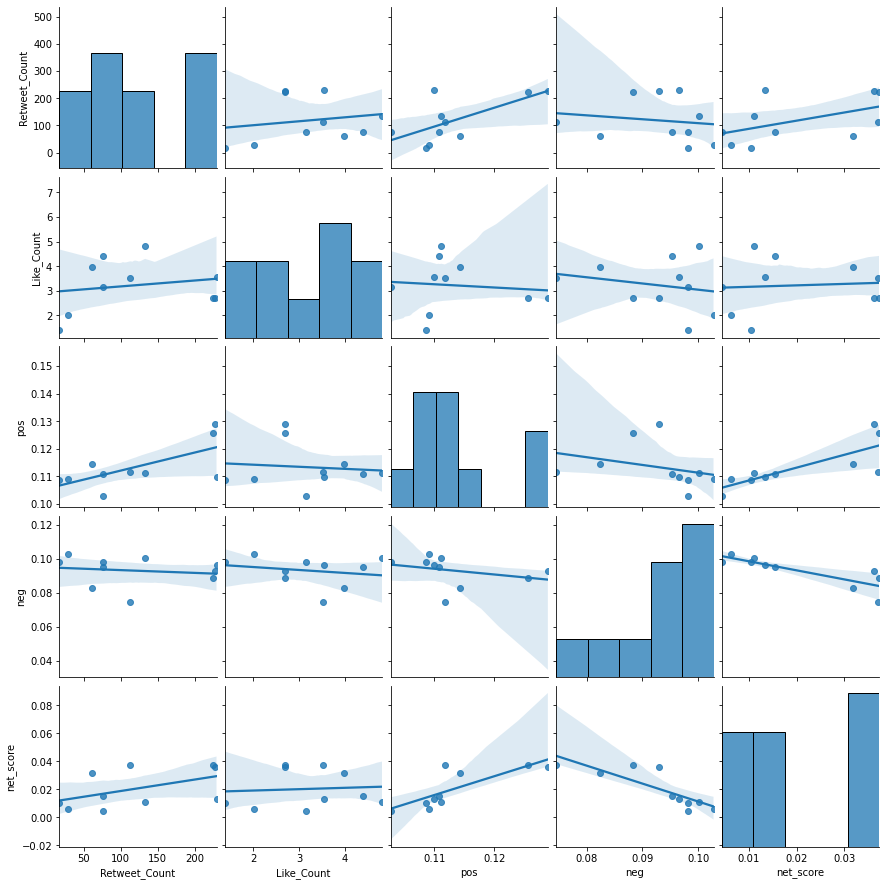

In [58]:
sns.pairplot(monthly_avg_score,kind='reg')
plt.show()

**B] b) Does the increase/decrease in the number of COVID-19 influence public sentiments?**

In [59]:
#Daily tweets from 2020-01-25 as per Covid cases data
daily_tweets = tweets_copy.iloc[np.where(tweets_copy['Tweet_Date']=='2020-01-25')[0][0]:]

In [60]:
#Creating average monthly score
daily_avg_score = daily_tweets.resample('D', on='Tweet_Date').mean()
daily_avg_score.drop('Tweet_ID',axis=1,inplace=True)

In [61]:
daily_avg_score['CovidCases'] = covid_cases['VIC'].values
daily_avg_score.head(3)

,Retweet_Count,Like_Count,pos,neg,net_score,CovidCases
Tweet_Date,,,,,,
2020-01-25,0.166667,0.500000,0.033667,0.222000,-0.188333,1
2020-01-26,31.142857,11.571429,0.088571,0.058643,0.029929,0
2020-01-27,19.500000,0.375000,0.180375,0.061875,0.118500,0


In [62]:
daily_avg_score.tail(3)

,Retweet_Count,Like_Count,pos,neg,net_score,CovidCases
Tweet_Date,,,,,,
2020-10-13,0.0,0.0,0.117839,0.095802,0.022037,10
2020-10-14,0.0,0.0,0.117685,0.091035,0.026650,6
2020-10-15,0.0,0.0,0.110263,0.100677,0.009585,6


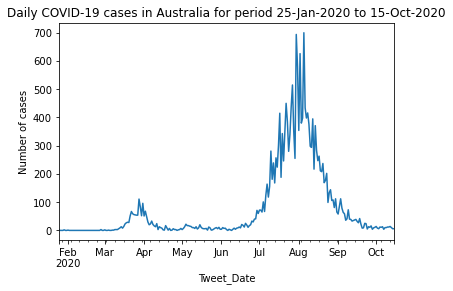

In [63]:
daily_avg_score['CovidCases'].plot(ylabel = "Number of cases",title="Daily COVID-19 cases in Australia for period 25-Jan-2020 to 15-Oct-2020")
plt.show()

In [64]:
#Correlation matrix
corr = daily_avg_score.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Retweet_Count,Like_Count,pos,neg,net_score,CovidCases
Retweet_Count,1.00,-0.02,0.08,0.03,0.03,0.42
Like_Count,-0.02,1.00,-0.09,-0.01,-0.05,0.13
pos,0.08,-0.09,1.00,-0.32,0.83,-0.01
neg,0.03,-0.01,-0.32,1.00,-0.80,0.07
net_score,0.03,-0.05,0.83,-0.80,1.00,-0.05
CovidCases,0.42,0.13,-0.01,0.07,-0.05,1.00


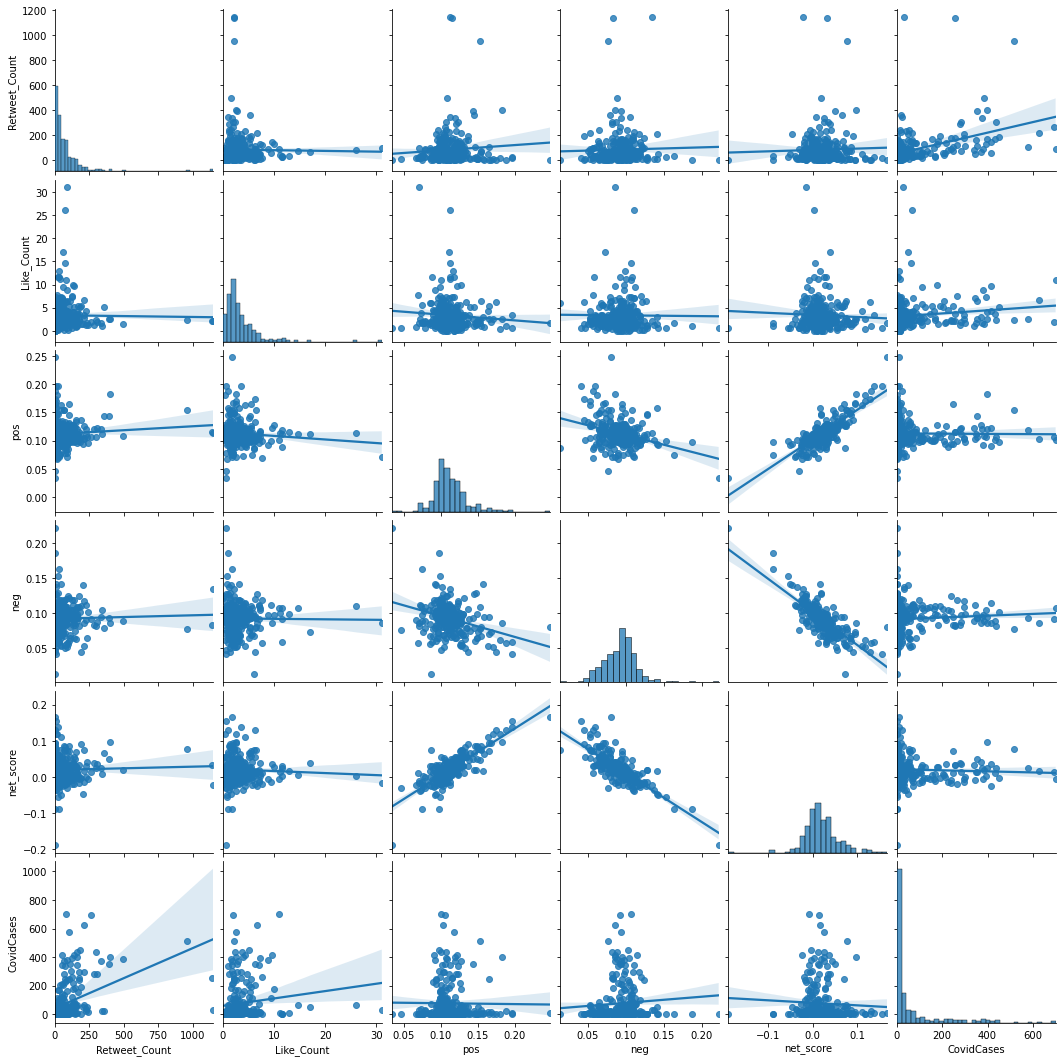

In [65]:
sns.pairplot(daily_avg_score,kind='reg')
plt.show()

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

Australians are concerned about public healthcare, economy, quarantine in this pandemic. But adverse financial impact on businesses due to lockdowns has caused bit agitation among people. However, most of the topics related to COVID-19 were discussed frequently when COVID-19 cases were less, but during spike in COVID-19 cases during Jul to Sep 2020, frequency of these topics was constant.

**Text processing**

In [66]:
#Creating tokens list function
tokens_list = []
for i in range(len(tweets_copy)):
    #Extracting text for each tweet
    text = tweets_copy['OnlyText'][i]
    
    #Initializing tokenizer
    tokenizer = RegexpTokenizer(r"\W+", gaps=True) 
    #Creating tokens
    tokens = tokenizer.tokenize(text)
    #Case normalization
    tokens = [token.lower() for token in tokens]
    #tokens = word_tokenize(text)
    tokens_list.append(tokens)

In [67]:
#Function to drop stopwords from tokens list
all_stopwords = gensim.parsing.preprocessing.STOPWORDS

filtered_tokens = []

for i in range(len(tweets_copy)):
    
    #Text extracting with case normalization
    text = tweets_copy['OnlyText'][i].lower()
    #Removing stopwords directly from the string instead of tokens
    filtered_token = remove_stopwords(text)
    filtered_tokens.append(filtered_token)    

In [68]:
filtered_tokens[:2]

['true good leader thanks dan',
 'showing true leadership presser unlike constantly downplayed severity fires ravaging nsw past 6 months yes 6 months mega started august 2019 h']

In [69]:
#Lemmatization after removing stopwords - Stackoverflow

nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN']): 
    output = []
    for sent in texts:
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output

In [70]:
tokenized_reviews = lemmatization(filtered_tokens)
tokenized_reviews[:2]

[['leader'],
 ['leadership', 'presser', 'severity', 'fire', 'month', 'month', 'mega', 'h']]

In [71]:
#Again checking for for additional stopwords after lemmatization - Stackoverflow

stop_words = stopwords.words('english')
stop_words.extend(['cant t','that s','have','get','want','tell','rachelbaxendale','get',
                   'look','take','go','it s','don t','ve','i m','-','won t','rwillingham',
                  'michaelobrienmp','timsmithmp','newbury3186','jennymikakos','victoriancho',
                  'scottmorrisonmp','skynewsaust','danielandrewsmp'])


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def filter_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words and len(word)>3] for doc in texts]

In [72]:
#Creating list of tokens
data_words = list(sent_to_words(tokenized_reviews))

# remove stop words
data_words = filter_stopwords(data_words)

In [73]:
#Creating corpora
dictionary = corpora.Dictionary(data_words)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [74]:
# Compute Coherence Score - Stackoverflow

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state=100,chunksize=2000,iterations=10,minimum_probability=0.0) 
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [75]:
n = 10
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=n, step=1)

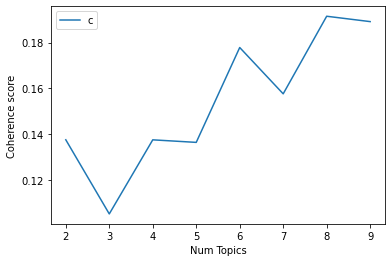

In [76]:
# Show graph
limit=n; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [77]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1377
Num Topics = 3  has Coherence Value of 0.1054
Num Topics = 4  has Coherence Value of 0.1376
Num Topics = 5  has Coherence Value of 0.1365
Num Topics = 6  has Coherence Value of 0.1778
Num Topics = 7  has Coherence Value of 0.1577
Num Topics = 8  has Coherence Value of 0.1914
Num Topics = 9  has Coherence Value of 0.1891


In [78]:
# Select the model with max coherence and print the topics
max_value = max(coherence_values)
max_index = coherence_values.index(max_value)
print(max_index)

optimal_model = model_list[int(max_index)]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

6


[(0,
  '0.058*"premier" + 0.049*"business" + 0.039*"presser" + 0.028*"response" + 0.026*"people" + 0.022*"community" + 0.020*"tweet" + 0.019*"hand" + 0.018*"hope" + 0.017*"advice"'),
 (1,
  '0.069*"death" + 0.046*"month" + 0.039*"mask" + 0.030*"fact" + 0.027*"people" + 0.024*"responsibility" + 0.022*"world" + 0.017*"woman" + 0.016*"incompetence" + 0.015*"rest"'),
 (2,
  '0.076*"lockdown" + 0.051*"thing" + 0.050*"quarantine" + 0.034*"restriction" + 0.032*"contact" + 0.027*"people" + 0.024*"truth" + 0.020*"mate" + 0.019*"word" + 0.017*"country"'),
 (3,
  '0.083*"case" + 0.077*"question" + 0.044*"number" + 0.038*"medium" + 0.029*"press" + 0.028*"leader" + 0.028*"conference" + 0.026*"journalist" + 0.025*"answer" + 0.025*"today"'),
 (4,
  '0.066*"year" + 0.065*"hotel" + 0.049*"thank" + 0.042*"decision" + 0.041*"family" + 0.026*"child" + 0.026*"step" + 0.024*"people" + 0.023*"school" + 0.020*"risk"'),
 (5,
  '0.068*"people" + 0.055*"work" + 0.033*"person" + 0.027*"home" + 0.024*"police" + 0.

In [79]:
# Visualize the topics - Stackoverflow
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.383076  0.087940       1        1  14.530905
7      0.044752 -0.171349       2        1  13.796491
2      0.090992 -0.101584       3        1  13.709773
6     -0.136738 -0.177150       4        1  12.897075
1      0.100484 -0.028228       5        1  12.141332
0      0.127836 -0.058145       6        1  11.467963
5      0.068307  0.134523       7        1  11.467653
4      0.087443  0.313992       8        1   9.988808, topic_info=            Term         Freq         Total Category  logprob  loglift
365         case  5595.000000   5595.000000  Default  30.0000  30.0000
47          time  5858.000000   5858.000000  Default  29.0000  29.0000
72      question  5154.000000   5154.000000  Default  28.0000  28.0000
1950    lockdown  4820.000000   4820.000000  Default  27.0000  27.0000
17         death  3865.000000   3865.000000  Default  26.0000  26.0000
...          ...          ...           ...      ...      ...      ...
16          year  3064.994064   3190.128600   Topic8  -2.7131   2.2637
438       family  1873.286038   2234.073046   Topic8  -3.2055   2.1276
77        people  1088.635221  12259.555688   Topic8  -3.7482  -0.1177
74          week   440.610857   2780.974688   Topic8  -4.6528   0.4613
37    government   429.017087   4774.301709   Topic8  -4.6794  -0.1058

[353 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1938      8  0.997531         ability
325       5  0.998346         account
2357      3  0.997178  accountability
175       1  0.003608          action
175       5  0.016839          action
...     ...       ...             ...
16        4  0.007210            year
16        5  0.028212            year
16        8  0.960776            year
338       1  0.951529       yesterday
338       2  0.046116       yesterday

[478 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 3, 7, 2, 1, 6, 5])

**Distribution of topics related to COVID-19 - Monthly**

In [80]:
#Creating a df with corpus and date as index
topic_dist = pd.DataFrame({'corpus':doc_term_matrix},index=tweets_copy['Tweet_Date'])
topic_dist.head(3)

,corpus
Tweet_Date,
2020-01-01,"[(0, 1)]"
2020-01-01,"[(1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1)]"
2020-01-01,"[(7, 1), (8, 1), (9, 1)]"


In [81]:
#Adding blank columns in dataframe for all topics
col_list = []
for i in range(len(model_topics)):
    cols = 'topic_'+str(range(len(model_topics))[i])
    col_list.append(cols)
topic_dist[col_list] = ""

In [82]:
topic_dist.head(3)

,corpus,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
Tweet_Date,,,,,,,,,
2020-01-01,"[(0, 1)]",,,,,,,,
2020-01-01,"[(1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1)]",,,,,,,,
2020-01-01,"[(7, 1), (8, 1), (9, 1)]",,,,,,,,


In [83]:
#Creating function to copy topic dominance for each tweet

for i in range(len(topic_dist)):
    
    #Giving input corpus to LDA model to get topic score
    dist = optimal_model[topic_dist['corpus'][i]]
    
    #Converting list to numpy array
    dist_array = np.array(dist)
    
    for j in range(len(model_topics)):
        #Copying data to dataframe
        topic_dist.values[:i+1,1:][i] = dist_array.T[1]       

In [84]:
#Creating average monthly score
daily_topic_dist = topic_dist.iloc[:,1:].astype('float')
daily_topic_dist = daily_topic_dist.groupby(daily_topic_dist.index).mean()
daily_topic_dist.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
Tweet_Date,,,,,,,,
2020-01-01,0.115237,0.122944,0.131635,0.209236,0.097713,0.117972,0.070530,0.134733
2020-01-02,0.106476,0.115632,0.082276,0.132456,0.279435,0.059344,0.140089,0.084293
2020-01-03,0.079216,0.090521,0.084575,0.171155,0.166763,0.188562,0.119839,0.099369
2020-01-04,0.120157,0.076244,0.060835,0.179311,0.081063,0.141009,0.181853,0.159527
2020-01-05,0.130899,0.140704,0.093900,0.126015,0.081272,0.088014,0.252630,0.086566


In [85]:
new_topic_dist = daily_topic_dist[daily_topic_dist.index>=covid_cases.iloc[0,0]]
new_topic_dist['covid_cases'] = covid_cases['VIC'].values
new_topic_dist.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,covid_cases
Tweet_Date,,,,,,,,,
2020-01-25,0.073424,0.058607,0.136198,0.088840,0.217742,0.135137,0.142268,0.147785,1
2020-01-26,0.078693,0.125219,0.033547,0.173781,0.127685,0.155098,0.147759,0.158218,0
2020-01-27,0.095060,0.167830,0.094592,0.107596,0.133987,0.191144,0.032099,0.177691,0
2020-01-28,0.099929,0.162692,0.105968,0.056063,0.089815,0.276189,0.112133,0.097212,0
2020-01-29,0.065346,0.160457,0.253708,0.116664,0.093812,0.088497,0.150905,0.070612,2


In [86]:
#Correlation matrix
corr1 = new_topic_dist.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,covid_cases
topic_0,1.00,-0.30,0.09,-0.00,-0.14,-0.10,-0.35,-0.05,-0.04
topic_1,-0.30,1.00,-0.27,-0.12,-0.24,0.05,-0.07,-0.13,0.10
topic_2,0.09,-0.27,1.00,0.16,-0.23,-0.33,-0.28,-0.10,0.15
topic_3,-0.00,-0.12,0.16,1.00,-0.18,-0.40,-0.25,-0.21,0.35
topic_4,-0.14,-0.24,-0.23,-0.18,1.00,-0.13,0.00,-0.15,-0.18
topic_5,-0.10,0.05,-0.33,-0.40,-0.13,1.00,-0.04,-0.05,-0.16
topic_6,-0.35,-0.07,-0.28,-0.25,0.00,-0.04,1.00,-0.15,-0.14
topic_7,-0.05,-0.13,-0.10,-0.21,-0.15,-0.05,-0.15,1.00,-0.08
covid_cases,-0.04,0.10,0.15,0.35,-0.18,-0.16,-0.14,-0.08,1.00


<AxesSubplot:xlabel='Tweet_Date'>

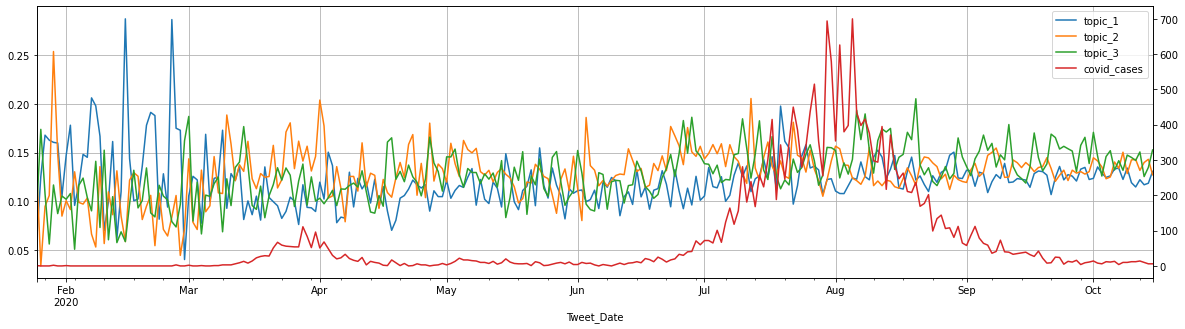

In [87]:
#Plotting topics related to covid cases based on correlation coefficient
new_topic_dist[['topic_1','topic_2','topic_3','covid_cases']]. \
plot(secondary_y=['covid_cases'],mark_right=False, figsize = (20,5), grid=True)

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

Adverse financial impact on businesses due to lockdowns has caused bit agitation among people. Australian government should accelerate vaccine drive to reduce frequency of lockdowns. Also, Australian government can perform sentiment analysis for different period and specific location to understand more comprehensive people sentiments related to COVID-19.

### References: 

Stackoverflow, 
Towardsdatascience

In [89]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.


In [90]:
jupyter nbconvert --to pdf notebook.ipynb  

SyntaxError: invalid syntax (<ipython-input-90-8f3684e5146c>, line 1)